In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


import keras
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os
import io
import requests


Using TensorFlow backend.


In [36]:
#functions

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    #data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
     #  'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
      # 'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m

#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['accuracy'])
    
    # print(model.summary())
    return(model)


#optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),

def save_model(model,string):
        model.save("heart_attack_risk_prediction_"+string+".h5")
    
def user_data_predict(model,data):
    data = np.expand_dims(data, axis=0)
    predections = model.predict_classes(data,batch_size=20,verbose=0)
    return predections

#to plot the traning and test accuracy
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [25]:
data_frame = read_csv_835()

835
835
835


In [26]:
data_set = create_data_set(data_frame)

In [39]:
float(65)/200

0.325

In [38]:
for i in data_set:
    print(i)

[ 1.18        2.22554093  1.10517092  2.71828183  1.10517092  1.10517092
  2.71828183  2.71828183  2.71828183  1.10517092  2.71828183  1.10517092
  1.10517092  1.10517092  1.         26.          1.          0.        ]
[ 1.3         2.22554093  2.71828183  1.10517092  1.10517092  2.71828183
  2.71828183  2.71828183  2.71828183  1.10517092  2.71828183  1.10517092
  1.10517092  2.71828183  1.         28.          1.          0.        ]
[ 1.06        2.22554093  1.64872127  2.71828183  1.10517092  2.71828183
  2.71828183  2.71828183  2.71828183  2.71828183  2.71828183  1.10517092
  1.10517092  1.10517092  1.         32.          1.          0.        ]
[ 0.8         1.8221188   1.10517092  1.10517092  1.10517092  1.10517092
  2.71828183  2.71828183  2.71828183  1.10517092  1.10517092  1.10517092
  1.10517092  2.71828183  0.         26.          0.          1.        ]
[ 0.84        1.8221188   1.10517092  1.10517092  1.10517092  1.10517092
  1.64872127  2.71828183  1.10517092  1.6487212

  1.10517092  1.10517092  1.         28.          1.          0.        ]
[ 0.96        2.22554093  1.64872127  2.71828183  1.10517092  1.10517092
  2.71828183  1.64872127  2.71828183  1.10517092  2.71828183  1.10517092
  1.10517092  1.64872127  0.         30.          0.          1.        ]
[ 0.98        1.8221188   1.10517092  2.71828183  1.10517092  2.71828183
  2.71828183  2.71828183  2.71828183  1.10517092  2.71828183  1.10517092
  1.10517092  2.71828183  0.         25.          0.          1.        ]
[ 0.8         2.22554093  1.10517092  1.10517092  1.10517092  1.10517092
  2.71828183  1.64872127  1.10517092  1.10517092  1.10517092  1.10517092
  1.10517092  2.71828183  0.         23.          0.          1.        ]
[ 1.1         2.22554093  1.10517092  1.10517092  1.10517092  1.10517092
  2.71828183  2.71828183  1.10517092  1.10517092  1.10517092  2.71828183
  1.10517092  1.10517092  1.         25.          1.          0.        ]
[ 0.86        1.8221188   1.10517092  2.718281

In [27]:
actual_x,actual_y = x_data_y_data_create(data_set)

In [28]:
batch_size = 20
num_classes = 2
epochs = 200

input_shape = len(actual_x[0])
kfold_validation_score_store = []
n_Of_fold = 10
kf = KFold(n_Of_fold)
number_of_fold = 0

score = 0.0
best_score = 0.0
best_model = Sequential()

terget_names = ["NO","YES"]


fold #1
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6755 - acc: 0.6019 - val_loss: 0.6703 - val_acc: 0.6071
Epoch 2/200
 - 0s - loss: 0.6725 - acc: 0.6019 - val_loss: 0.6659 - val_acc: 0.6071
Epoch 3/200
 - 0s - loss: 0.6682 - acc: 0.6019 - val_loss: 0.6636 - val_acc: 0.6071
Epoch 4/200
 - 0s - loss: 0.6669 - acc: 0.6019 - val_loss: 0.6627 - val_acc: 0.6071
Epoch 5/200
 - 0s - loss: 0.6664 - acc: 0.6019 - val_loss: 0.6620 - val_acc: 0.6071
Epoch 6/200
 - 0s - loss: 0.6659 - acc: 0.6019 - val_loss: 0.6616 - val_acc: 0.6071
Epoch 7/200
 - 0s - loss: 0.6655 - acc: 0.6019 - val_loss: 0.6612 - val_acc: 0.6071
Epoch 8/200
 - 0s - loss: 0.6653 - acc: 0.6019 - val_loss: 0.6607 - val_acc: 0.6071
Epoch 9/200
 - 0s - loss: 0.6650 - acc: 0.6019 - val_loss: 0.6602 - val_acc: 0.6071
Epoch 10/200
 - 0s - loss: 0.6647 - acc: 0.6019 - val_loss: 0.6599 - val_acc: 0.6071
Epoch 11/200
 - 0s - loss: 0.6645 - acc: 0.6019 - val_loss: 0.6595 - val_acc: 0.6071
Epoch 12/200
 - 0s - 

Epoch 97/200
 - 0s - loss: 0.6567 - acc: 0.6019 - val_loss: 0.6507 - val_acc: 0.6071
Epoch 98/200
 - 0s - loss: 0.6566 - acc: 0.6019 - val_loss: 0.6506 - val_acc: 0.6071
Epoch 99/200
 - 0s - loss: 0.6565 - acc: 0.6019 - val_loss: 0.6504 - val_acc: 0.6071
Epoch 100/200
 - 0s - loss: 0.6564 - acc: 0.6019 - val_loss: 0.6503 - val_acc: 0.6071
Epoch 101/200
 - 0s - loss: 0.6563 - acc: 0.6019 - val_loss: 0.6502 - val_acc: 0.6071
Epoch 102/200
 - 0s - loss: 0.6562 - acc: 0.6019 - val_loss: 0.6501 - val_acc: 0.6071
Epoch 103/200
 - 0s - loss: 0.6561 - acc: 0.6019 - val_loss: 0.6500 - val_acc: 0.6071
Epoch 104/200
 - 0s - loss: 0.6560 - acc: 0.6019 - val_loss: 0.6500 - val_acc: 0.6071
Epoch 105/200
 - 0s - loss: 0.6559 - acc: 0.6019 - val_loss: 0.6499 - val_acc: 0.6071
Epoch 106/200
 - 0s - loss: 0.6558 - acc: 0.6019 - val_loss: 0.6499 - val_acc: 0.6071
Epoch 107/200
 - 0s - loss: 0.6557 - acc: 0.6019 - val_loss: 0.6498 - val_acc: 0.6071
Epoch 108/200
 - 0s - loss: 0.6556 - acc: 0.6019 - val_lo

Epoch 193/200
 - 0s - loss: 0.6456 - acc: 0.6019 - val_loss: 0.6391 - val_acc: 0.6071
Epoch 194/200
 - 0s - loss: 0.6454 - acc: 0.6019 - val_loss: 0.6391 - val_acc: 0.6071
Epoch 195/200
 - 0s - loss: 0.6453 - acc: 0.6019 - val_loss: 0.6389 - val_acc: 0.6071
Epoch 196/200
 - 0s - loss: 0.6451 - acc: 0.6019 - val_loss: 0.6388 - val_acc: 0.6071
Epoch 197/200
 - 0s - loss: 0.6450 - acc: 0.6019 - val_loss: 0.6386 - val_acc: 0.6071
Epoch 198/200
 - 0s - loss: 0.6449 - acc: 0.6019 - val_loss: 0.6385 - val_acc: 0.6071
Epoch 199/200
 - 0s - loss: 0.6447 - acc: 0.6019 - val_loss: 0.6384 - val_acc: 0.6071
Epoch 200/200
 - 0s - loss: 0.6446 - acc: 0.6019 - val_loss: 0.6382 - val_acc: 0.6071


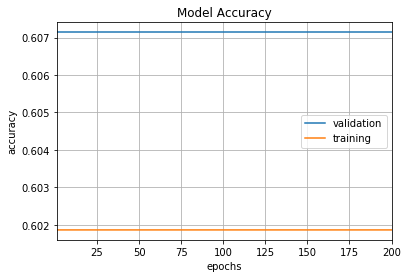

84/84 [==============================] - 0s 45us/step

Fold 1 score : [0.6381621786526271, 0.6071428585620153]
 Score: 0.6071428585620153
fold #2
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7109 - acc: 0.3955 - val_loss: 0.7059 - val_acc: 0.4167
Epoch 2/200
 - 0s - loss: 0.7063 - acc: 0.3955 - val_loss: 0.7022 - val_acc: 0.4167
Epoch 3/200
 - 0s - loss: 0.7023 - acc: 0.3955 - val_loss: 0.6988 - val_acc: 0.4167
Epoch 4/200
 - 0s - loss: 0.6982 - acc: 0.3941 - val_loss: 0.6949 - val_acc: 0.4048
Epoch 5/200
 - 0s - loss: 0.6939 - acc: 0.4594 - val_loss: 0.6913 - val_acc: 0.6310
Epoch 6/200
 - 0s - loss: 0.6914 - acc: 0.6019 - val_loss: 0.6905 - val_acc: 0.6429
Epoch 7/200
 - 0s - loss: 0.6907 - acc: 0.6498 - val_loss: 0.6898 - val_acc: 0.6786
Epoch 8/200
 - 0s - loss: 0.6901 - acc: 0.6818 - val_loss: 0.6888 - val_acc: 0.6905
Epoch 9/200
 - 0s - loss: 0.6883 - acc: 0.6019 - val_loss: 0.6848 - val_acc: 0.6429
Epoch 10/200
 - 0s - loss: 0.6856 - acc: 0.5939 - val

Epoch 96/200
 - 0s - loss: 0.6344 - acc: 0.8628 - val_loss: 0.6313 - val_acc: 0.8690
Epoch 97/200
 - 0s - loss: 0.6337 - acc: 0.8642 - val_loss: 0.6355 - val_acc: 0.8690
Epoch 98/200
 - 0s - loss: 0.6332 - acc: 0.8642 - val_loss: 0.6308 - val_acc: 0.8929
Epoch 99/200
 - 0s - loss: 0.6329 - acc: 0.8642 - val_loss: 0.6292 - val_acc: 0.8690
Epoch 100/200
 - 0s - loss: 0.6321 - acc: 0.8615 - val_loss: 0.6286 - val_acc: 0.8690
Epoch 101/200
 - 0s - loss: 0.6314 - acc: 0.8628 - val_loss: 0.6280 - val_acc: 0.8690
Epoch 102/200
 - 0s - loss: 0.6308 - acc: 0.8682 - val_loss: 0.6277 - val_acc: 0.8929
Epoch 103/200
 - 0s - loss: 0.6304 - acc: 0.8642 - val_loss: 0.6304 - val_acc: 0.8571
Epoch 104/200
 - 0s - loss: 0.6299 - acc: 0.8668 - val_loss: 0.6288 - val_acc: 0.8571
Epoch 105/200
 - 0s - loss: 0.6294 - acc: 0.8628 - val_loss: 0.6283 - val_acc: 0.8571
Epoch 106/200
 - 0s - loss: 0.6285 - acc: 0.8668 - val_loss: 0.6282 - val_acc: 0.8571
Epoch 107/200
 - 0s - loss: 0.6283 - acc: 0.8642 - val_los

Epoch 192/200
 - 0s - loss: 0.5751 - acc: 0.8762 - val_loss: 0.5708 - val_acc: 0.8929
Epoch 193/200
 - 0s - loss: 0.5743 - acc: 0.8748 - val_loss: 0.5700 - val_acc: 0.8810
Epoch 194/200
 - 0s - loss: 0.5737 - acc: 0.8735 - val_loss: 0.5707 - val_acc: 0.8571
Epoch 195/200
 - 0s - loss: 0.5730 - acc: 0.8748 - val_loss: 0.5685 - val_acc: 0.8929
Epoch 196/200
 - 0s - loss: 0.5723 - acc: 0.8762 - val_loss: 0.5678 - val_acc: 0.8929
Epoch 197/200
 - 0s - loss: 0.5716 - acc: 0.8722 - val_loss: 0.5675 - val_acc: 0.8810
Epoch 198/200
 - 0s - loss: 0.5710 - acc: 0.8735 - val_loss: 0.5665 - val_acc: 0.8810
Epoch 199/200
 - 0s - loss: 0.5703 - acc: 0.8735 - val_loss: 0.5676 - val_acc: 0.8571
Epoch 200/200
 - 0s - loss: 0.5696 - acc: 0.8762 - val_loss: 0.5686 - val_acc: 0.8571


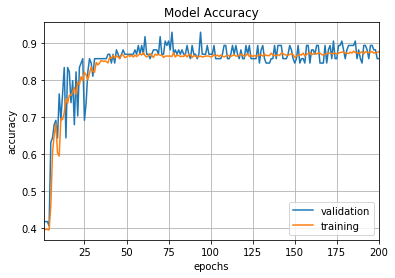

84/84 [==============================] - 0s 41us/step

Fold 2 score : [0.5686491500763666, 0.8571428514662243]
 Score: 0.8571428514662243
fold #3
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6899 - acc: 0.6032 - val_loss: 0.6898 - val_acc: 0.5952
Epoch 2/200
 - 0s - loss: 0.6894 - acc: 0.6032 - val_loss: 0.6895 - val_acc: 0.5952
Epoch 3/200
 - 0s - loss: 0.6891 - acc: 0.6032 - val_loss: 0.6892 - val_acc: 0.5952
Epoch 4/200
 - 0s - loss: 0.6888 - acc: 0.6032 - val_loss: 0.6889 - val_acc: 0.5952
Epoch 5/200
 - 0s - loss: 0.6885 - acc: 0.6032 - val_loss: 0.6886 - val_acc: 0.5952
Epoch 6/200
 - 0s - loss: 0.6882 - acc: 0.6032 - val_loss: 0.6884 - val_acc: 0.5952
Epoch 7/200
 - 0s - loss: 0.6879 - acc: 0.6032 - val_loss: 0.6881 - val_acc: 0.5952
Epoch 8/200
 - 0s - loss: 0.6876 - acc: 0.6032 - val_loss: 0.6878 - val_acc: 0.5952
Epoch 9/200
 - 0s - loss: 0.6873 - acc: 0.6032 - val_loss: 0.6876 - val_acc: 0.5952
Epoch 10/200
 - 0s - loss: 0.6870 - acc: 0.6032 - val

Epoch 96/200
 - 0s - loss: 0.6676 - acc: 0.6032 - val_loss: 0.6705 - val_acc: 0.5952
Epoch 97/200
 - 0s - loss: 0.6675 - acc: 0.6032 - val_loss: 0.6704 - val_acc: 0.5952
Epoch 98/200
 - 0s - loss: 0.6674 - acc: 0.6032 - val_loss: 0.6704 - val_acc: 0.5952
Epoch 99/200
 - 0s - loss: 0.6673 - acc: 0.6032 - val_loss: 0.6703 - val_acc: 0.5952
Epoch 100/200
 - 0s - loss: 0.6672 - acc: 0.6032 - val_loss: 0.6702 - val_acc: 0.5952
Epoch 101/200
 - 0s - loss: 0.6671 - acc: 0.6032 - val_loss: 0.6702 - val_acc: 0.5952
Epoch 102/200
 - 0s - loss: 0.6670 - acc: 0.6032 - val_loss: 0.6701 - val_acc: 0.5952
Epoch 103/200
 - 0s - loss: 0.6669 - acc: 0.6032 - val_loss: 0.6701 - val_acc: 0.5952
Epoch 104/200
 - 0s - loss: 0.6668 - acc: 0.6032 - val_loss: 0.6700 - val_acc: 0.5952
Epoch 105/200
 - 0s - loss: 0.6668 - acc: 0.6032 - val_loss: 0.6700 - val_acc: 0.5952
Epoch 106/200
 - 0s - loss: 0.6667 - acc: 0.6032 - val_loss: 0.6699 - val_acc: 0.5952
Epoch 107/200
 - 0s - loss: 0.6666 - acc: 0.6032 - val_los

Epoch 192/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6686 - val_acc: 0.5952
Epoch 193/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6686 - val_acc: 0.5952
Epoch 194/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6686 - val_acc: 0.5952
Epoch 195/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952
Epoch 196/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952
Epoch 197/200
 - 0s - loss: 0.6643 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952
Epoch 198/200
 - 0s - loss: 0.6642 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952
Epoch 199/200
 - 0s - loss: 0.6642 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952
Epoch 200/200
 - 0s - loss: 0.6642 - acc: 0.6032 - val_loss: 0.6685 - val_acc: 0.5952


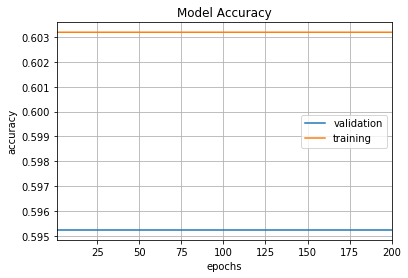

84/84 [==============================] - 0s 42us/step

Fold 3 score : [0.6685187986918858, 0.5952380895614624]
 Score: 0.8571428514662243
fold #4
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.7511 - acc: 0.3968 - val_loss: 0.6917 - val_acc: 0.4881
Epoch 2/200
 - 0s - loss: 0.6919 - acc: 0.4874 - val_loss: 0.6904 - val_acc: 0.5595
Epoch 3/200
 - 0s - loss: 0.6910 - acc: 0.5819 - val_loss: 0.6901 - val_acc: 0.5357
Epoch 4/200
 - 0s - loss: 0.6906 - acc: 0.6032 - val_loss: 0.6896 - val_acc: 0.6548
Epoch 5/200
 - 0s - loss: 0.6902 - acc: 0.6352 - val_loss: 0.6898 - val_acc: 0.7262
Epoch 6/200
 - 0s - loss: 0.6900 - acc: 0.6538 - val_loss: 0.6889 - val_acc: 0.6071
Epoch 7/200
 - 0s - loss: 0.6896 - acc: 0.6525 - val_loss: 0.6886 - val_acc: 0.6310
Epoch 8/200
 - 0s - loss: 0.6893 - acc: 0.6551 - val_loss: 0.6883 - val_acc: 0.7500
Epoch 9/200
 - 0s - loss: 0.6889 - acc: 0.6724 - val_loss: 0.6880 - val_acc: 0.7619
Epoch 10/200
 - 0s - loss: 0.6886 - acc: 0.6831 - val

Epoch 96/200
 - 0s - loss: 0.6517 - acc: 0.8522 - val_loss: 0.6504 - val_acc: 0.8333
Epoch 97/200
 - 0s - loss: 0.6517 - acc: 0.8509 - val_loss: 0.6498 - val_acc: 0.8452
Epoch 98/200
 - 0s - loss: 0.6507 - acc: 0.8495 - val_loss: 0.6517 - val_acc: 0.8214
Epoch 99/200
 - 0s - loss: 0.6506 - acc: 0.8429 - val_loss: 0.6493 - val_acc: 0.8452
Epoch 100/200
 - 0s - loss: 0.6495 - acc: 0.8562 - val_loss: 0.6472 - val_acc: 0.8333
Epoch 101/200
 - 0s - loss: 0.6490 - acc: 0.8442 - val_loss: 0.6486 - val_acc: 0.8452
Epoch 102/200
 - 0s - loss: 0.6484 - acc: 0.8469 - val_loss: 0.6461 - val_acc: 0.8333
Epoch 103/200
 - 0s - loss: 0.6475 - acc: 0.8469 - val_loss: 0.6450 - val_acc: 0.8333
Epoch 104/200
 - 0s - loss: 0.6468 - acc: 0.8535 - val_loss: 0.6490 - val_acc: 0.8214
Epoch 105/200
 - 0s - loss: 0.6463 - acc: 0.8575 - val_loss: 0.6442 - val_acc: 0.8333
Epoch 106/200
 - 0s - loss: 0.6452 - acc: 0.8535 - val_loss: 0.6438 - val_acc: 0.8571
Epoch 107/200
 - 0s - loss: 0.6444 - acc: 0.8575 - val_los

Epoch 192/200
 - 0s - loss: 0.5836 - acc: 0.8695 - val_loss: 0.5815 - val_acc: 0.8452
Epoch 193/200
 - 0s - loss: 0.5827 - acc: 0.8628 - val_loss: 0.5815 - val_acc: 0.8929
Epoch 194/200
 - 0s - loss: 0.5822 - acc: 0.8708 - val_loss: 0.5801 - val_acc: 0.8452
Epoch 195/200
 - 0s - loss: 0.5811 - acc: 0.8695 - val_loss: 0.5841 - val_acc: 0.8452
Epoch 196/200
 - 0s - loss: 0.5809 - acc: 0.8642 - val_loss: 0.5791 - val_acc: 0.8929
Epoch 197/200
 - 0s - loss: 0.5801 - acc: 0.8748 - val_loss: 0.5796 - val_acc: 0.8333
Epoch 198/200
 - 0s - loss: 0.5792 - acc: 0.8722 - val_loss: 0.5775 - val_acc: 0.8452
Epoch 199/200
 - 0s - loss: 0.5781 - acc: 0.8708 - val_loss: 0.5759 - val_acc: 0.8690
Epoch 200/200
 - 0s - loss: 0.5776 - acc: 0.8735 - val_loss: 0.5750 - val_acc: 0.8690


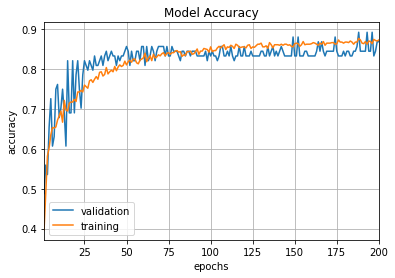

84/84 [==============================] - 0s 42us/step

Fold 4 score : [0.5750076827548799, 0.8690476190476191]
 Score: 0.8690476190476191
fold #5
Train on 751 samples, validate on 84 samples
Epoch 1/200
 - 1s - loss: 0.6834 - acc: 0.5979 - val_loss: 0.6713 - val_acc: 0.6190
Epoch 2/200
 - 0s - loss: 0.6770 - acc: 0.6005 - val_loss: 0.6678 - val_acc: 0.6190
Epoch 3/200
 - 0s - loss: 0.6751 - acc: 0.6005 - val_loss: 0.6662 - val_acc: 0.6190
Epoch 4/200
 - 0s - loss: 0.6740 - acc: 0.6005 - val_loss: 0.6644 - val_acc: 0.6190
Epoch 5/200
 - 0s - loss: 0.6728 - acc: 0.6005 - val_loss: 0.6630 - val_acc: 0.6190
Epoch 6/200
 - 0s - loss: 0.6716 - acc: 0.6005 - val_loss: 0.6620 - val_acc: 0.6190
Epoch 7/200
 - 0s - loss: 0.6701 - acc: 0.6005 - val_loss: 0.6618 - val_acc: 0.6190
Epoch 8/200
 - 0s - loss: 0.6697 - acc: 0.6005 - val_loss: 0.6616 - val_acc: 0.6190
Epoch 9/200
 - 0s - loss: 0.6695 - acc: 0.6005 - val_loss: 0.6614 - val_acc: 0.6190
Epoch 10/200
 - 0s - loss: 0.6693 - acc: 0.6005 - val

Epoch 96/200
 - 0s - loss: 0.6474 - acc: 0.6005 - val_loss: 0.6425 - val_acc: 0.6190
Epoch 97/200
 - 0s - loss: 0.6471 - acc: 0.6005 - val_loss: 0.6422 - val_acc: 0.6190
Epoch 98/200
 - 0s - loss: 0.6469 - acc: 0.6005 - val_loss: 0.6419 - val_acc: 0.6190
Epoch 99/200
 - 0s - loss: 0.6466 - acc: 0.6005 - val_loss: 0.6417 - val_acc: 0.6190
Epoch 100/200
 - 0s - loss: 0.6464 - acc: 0.6005 - val_loss: 0.6414 - val_acc: 0.6190
Epoch 101/200
 - 0s - loss: 0.6460 - acc: 0.6005 - val_loss: 0.6412 - val_acc: 0.6190
Epoch 102/200
 - 0s - loss: 0.6458 - acc: 0.6005 - val_loss: 0.6409 - val_acc: 0.6190
Epoch 103/200
 - 0s - loss: 0.6455 - acc: 0.6005 - val_loss: 0.6407 - val_acc: 0.6190
Epoch 104/200
 - 0s - loss: 0.6453 - acc: 0.6005 - val_loss: 0.6405 - val_acc: 0.6190
Epoch 105/200
 - 0s - loss: 0.6449 - acc: 0.6005 - val_loss: 0.6403 - val_acc: 0.6190
Epoch 106/200
 - 0s - loss: 0.6447 - acc: 0.6005 - val_loss: 0.6401 - val_acc: 0.6190
Epoch 107/200
 - 0s - loss: 0.6444 - acc: 0.6005 - val_los

Epoch 192/200
 - 0s - loss: 0.6174 - acc: 0.6005 - val_loss: 0.6158 - val_acc: 0.6190
Epoch 193/200
 - 0s - loss: 0.6170 - acc: 0.6005 - val_loss: 0.6155 - val_acc: 0.6190
Epoch 194/200
 - 0s - loss: 0.6167 - acc: 0.6005 - val_loss: 0.6153 - val_acc: 0.6190
Epoch 195/200
 - 0s - loss: 0.6163 - acc: 0.6005 - val_loss: 0.6148 - val_acc: 0.6190
Epoch 196/200
 - 0s - loss: 0.6159 - acc: 0.6005 - val_loss: 0.6145 - val_acc: 0.6190
Epoch 197/200
 - 0s - loss: 0.6155 - acc: 0.6005 - val_loss: 0.6141 - val_acc: 0.6190
Epoch 198/200
 - 0s - loss: 0.6150 - acc: 0.6005 - val_loss: 0.6138 - val_acc: 0.6190
Epoch 199/200
 - 0s - loss: 0.6147 - acc: 0.6005 - val_loss: 0.6134 - val_acc: 0.6190
Epoch 200/200
 - 0s - loss: 0.6143 - acc: 0.6005 - val_loss: 0.6130 - val_acc: 0.6190


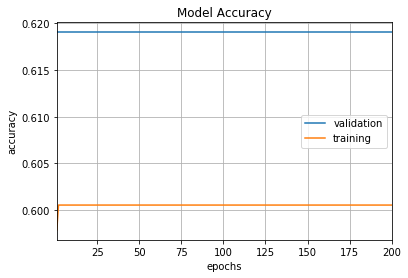

84/84 [==============================] - 0s 46us/step

Fold 5 score : [0.6130000125794184, 0.6190476218859354]
 Score: 0.8690476190476191
fold #6
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7960 - acc: 0.3976 - val_loss: 0.7483 - val_acc: 0.3976
Epoch 2/200
 - 0s - loss: 0.7332 - acc: 0.3777 - val_loss: 0.7075 - val_acc: 0.3735
Epoch 3/200
 - 0s - loss: 0.6851 - acc: 0.5798 - val_loss: 0.6823 - val_acc: 0.6024
Epoch 4/200
 - 0s - loss: 0.6774 - acc: 0.6024 - val_loss: 0.6801 - val_acc: 0.6024
Epoch 5/200
 - 0s - loss: 0.6750 - acc: 0.6024 - val_loss: 0.6785 - val_acc: 0.6024
Epoch 6/200
 - 0s - loss: 0.6731 - acc: 0.6024 - val_loss: 0.6771 - val_acc: 0.6024
Epoch 7/200
 - 0s - loss: 0.6714 - acc: 0.6024 - val_loss: 0.6760 - val_acc: 0.6024
Epoch 8/200
 - 0s - loss: 0.6700 - acc: 0.6024 - val_loss: 0.6753 - val_acc: 0.6024
Epoch 9/200
 - 0s - loss: 0.6690 - acc: 0.6024 - val_loss: 0.6749 - val_acc: 0.6024
Epoch 10/200
 - 0s - loss: 0.6684 - acc: 0.6024 - val

Epoch 96/200
 - 0s - loss: 0.6570 - acc: 0.6024 - val_loss: 0.6667 - val_acc: 0.6024
Epoch 97/200
 - 0s - loss: 0.6570 - acc: 0.6024 - val_loss: 0.6667 - val_acc: 0.6024
Epoch 98/200
 - 0s - loss: 0.6568 - acc: 0.6024 - val_loss: 0.6666 - val_acc: 0.6024
Epoch 99/200
 - 0s - loss: 0.6567 - acc: 0.6024 - val_loss: 0.6665 - val_acc: 0.6024
Epoch 100/200
 - 0s - loss: 0.6566 - acc: 0.6024 - val_loss: 0.6664 - val_acc: 0.6024
Epoch 101/200
 - 0s - loss: 0.6565 - acc: 0.6024 - val_loss: 0.6663 - val_acc: 0.6024
Epoch 102/200
 - 0s - loss: 0.6563 - acc: 0.6024 - val_loss: 0.6662 - val_acc: 0.6024
Epoch 103/200
 - 0s - loss: 0.6563 - acc: 0.6024 - val_loss: 0.6661 - val_acc: 0.6024
Epoch 104/200
 - 0s - loss: 0.6561 - acc: 0.6024 - val_loss: 0.6659 - val_acc: 0.6024
Epoch 105/200
 - 0s - loss: 0.6560 - acc: 0.6024 - val_loss: 0.6658 - val_acc: 0.6024
Epoch 106/200
 - 0s - loss: 0.6559 - acc: 0.6024 - val_loss: 0.6657 - val_acc: 0.6024
Epoch 107/200
 - 0s - loss: 0.6558 - acc: 0.6024 - val_los

Epoch 192/200
 - 0s - loss: 0.6442 - acc: 0.6024 - val_loss: 0.6556 - val_acc: 0.6024
Epoch 193/200
 - 0s - loss: 0.6440 - acc: 0.6024 - val_loss: 0.6555 - val_acc: 0.6024
Epoch 194/200
 - 0s - loss: 0.6439 - acc: 0.6024 - val_loss: 0.6554 - val_acc: 0.6024
Epoch 195/200
 - 0s - loss: 0.6437 - acc: 0.6024 - val_loss: 0.6553 - val_acc: 0.6024
Epoch 196/200
 - 0s - loss: 0.6435 - acc: 0.6024 - val_loss: 0.6552 - val_acc: 0.6024
Epoch 197/200
 - 0s - loss: 0.6433 - acc: 0.6024 - val_loss: 0.6551 - val_acc: 0.6024
Epoch 198/200
 - 0s - loss: 0.6431 - acc: 0.6024 - val_loss: 0.6549 - val_acc: 0.6024
Epoch 199/200
 - 0s - loss: 0.6430 - acc: 0.6024 - val_loss: 0.6547 - val_acc: 0.6024
Epoch 200/200
 - 0s - loss: 0.6428 - acc: 0.6024 - val_loss: 0.6546 - val_acc: 0.6024


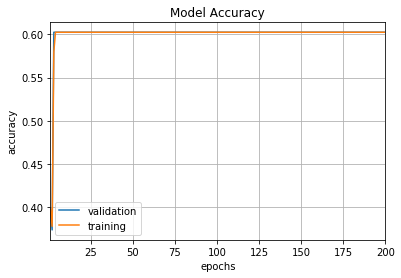

83/83 [==============================] - 0s 45us/step

Fold 6 score : [0.6545711367963308, 0.6024096378360886]
 Score: 0.8690476190476191
fold #7
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.6779 - acc: 0.5984 - val_loss: 0.6614 - val_acc: 0.6386
Epoch 2/200
 - 0s - loss: 0.6759 - acc: 0.5984 - val_loss: 0.6591 - val_acc: 0.6386
Epoch 3/200
 - 0s - loss: 0.6741 - acc: 0.5984 - val_loss: 0.6572 - val_acc: 0.6386
Epoch 4/200
 - 0s - loss: 0.6728 - acc: 0.5984 - val_loss: 0.6549 - val_acc: 0.6386
Epoch 5/200
 - 0s - loss: 0.6719 - acc: 0.5984 - val_loss: 0.6540 - val_acc: 0.6386
Epoch 6/200
 - 0s - loss: 0.6705 - acc: 0.5984 - val_loss: 0.6537 - val_acc: 0.6386
Epoch 7/200
 - 0s - loss: 0.6697 - acc: 0.5984 - val_loss: 0.6512 - val_acc: 0.6386
Epoch 8/200
 - 0s - loss: 0.6686 - acc: 0.5984 - val_loss: 0.6504 - val_acc: 0.6386
Epoch 9/200
 - 0s - loss: 0.6678 - acc: 0.5984 - val_loss: 0.6486 - val_acc: 0.6386
Epoch 10/200
 - 0s - loss: 0.6669 - acc: 0.5984 - val

Epoch 96/200
 - 0s - loss: 0.5613 - acc: 0.6902 - val_loss: 0.5277 - val_acc: 0.8072
Epoch 97/200
 - 0s - loss: 0.5605 - acc: 0.7061 - val_loss: 0.5207 - val_acc: 0.6867
Epoch 98/200
 - 0s - loss: 0.5592 - acc: 0.6888 - val_loss: 0.5238 - val_acc: 0.7952
Epoch 99/200
 - 0s - loss: 0.5579 - acc: 0.7128 - val_loss: 0.5183 - val_acc: 0.6867
Epoch 100/200
 - 0s - loss: 0.5572 - acc: 0.6928 - val_loss: 0.5240 - val_acc: 0.8193
Epoch 101/200
 - 0s - loss: 0.5566 - acc: 0.7101 - val_loss: 0.5216 - val_acc: 0.8072
Epoch 102/200
 - 0s - loss: 0.5560 - acc: 0.7207 - val_loss: 0.5151 - val_acc: 0.6988
Epoch 103/200
 - 0s - loss: 0.5546 - acc: 0.7101 - val_loss: 0.5167 - val_acc: 0.7952
Epoch 104/200
 - 0s - loss: 0.5537 - acc: 0.7035 - val_loss: 0.5198 - val_acc: 0.8193
Epoch 105/200
 - 0s - loss: 0.5529 - acc: 0.7247 - val_loss: 0.5128 - val_acc: 0.7711
Epoch 106/200
 - 0s - loss: 0.5519 - acc: 0.7168 - val_loss: 0.5156 - val_acc: 0.8072
Epoch 107/200
 - 0s - loss: 0.5507 - acc: 0.7247 - val_los

Epoch 192/200
 - 0s - loss: 0.4844 - acc: 0.8218 - val_loss: 0.4361 - val_acc: 0.8072
Epoch 193/200
 - 0s - loss: 0.4840 - acc: 0.8138 - val_loss: 0.4358 - val_acc: 0.8193
Epoch 194/200
 - 0s - loss: 0.4833 - acc: 0.8098 - val_loss: 0.4376 - val_acc: 0.8434
Epoch 195/200
 - 0s - loss: 0.4827 - acc: 0.8218 - val_loss: 0.4367 - val_acc: 0.8434
Epoch 196/200
 - 0s - loss: 0.4816 - acc: 0.8098 - val_loss: 0.4394 - val_acc: 0.8795
Epoch 197/200
 - 0s - loss: 0.4813 - acc: 0.8271 - val_loss: 0.4329 - val_acc: 0.8193
Epoch 198/200
 - 0s - loss: 0.4807 - acc: 0.8152 - val_loss: 0.4328 - val_acc: 0.8313
Epoch 199/200
 - 0s - loss: 0.4795 - acc: 0.8138 - val_loss: 0.4348 - val_acc: 0.8675
Epoch 200/200
 - 0s - loss: 0.4790 - acc: 0.8245 - val_loss: 0.4305 - val_acc: 0.8193


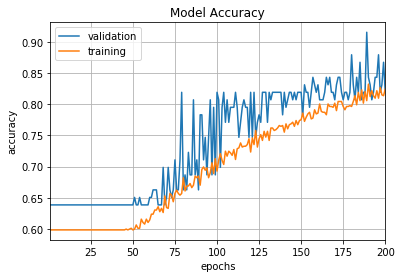

83/83 [==============================] - 0s 48us/step

Fold 7 score : [0.4304928241005863, 0.8192771098699915]
 Score: 0.8690476190476191
fold #8
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7006 - acc: 0.4960 - val_loss: 0.6936 - val_acc: 0.5181
Epoch 2/200
 - 0s - loss: 0.6913 - acc: 0.6263 - val_loss: 0.6925 - val_acc: 0.5422
Epoch 3/200
 - 0s - loss: 0.6909 - acc: 0.6782 - val_loss: 0.6927 - val_acc: 0.5904
Epoch 4/200
 - 0s - loss: 0.6906 - acc: 0.7088 - val_loss: 0.6926 - val_acc: 0.6024
Epoch 5/200
 - 0s - loss: 0.6905 - acc: 0.6928 - val_loss: 0.6918 - val_acc: 0.6506
Epoch 6/200
 - 0s - loss: 0.6904 - acc: 0.6981 - val_loss: 0.6920 - val_acc: 0.6024
Epoch 7/200
 - 0s - loss: 0.6900 - acc: 0.6941 - val_loss: 0.6919 - val_acc: 0.5904
Epoch 8/200
 - 0s - loss: 0.6898 - acc: 0.6902 - val_loss: 0.6920 - val_acc: 0.6145
Epoch 9/200
 - 0s - loss: 0.6895 - acc: 0.6941 - val_loss: 0.6926 - val_acc: 0.5301
Epoch 10/200
 - 0s - loss: 0.6894 - acc: 0.6622 - val

Epoch 96/200
 - 0s - loss: 0.6211 - acc: 0.9707 - val_loss: 0.6106 - val_acc: 0.9759
Epoch 97/200
 - 0s - loss: 0.6203 - acc: 0.9694 - val_loss: 0.6130 - val_acc: 0.9759
Epoch 98/200
 - 0s - loss: 0.6192 - acc: 0.9694 - val_loss: 0.6087 - val_acc: 0.9880
Epoch 99/200
 - 0s - loss: 0.6181 - acc: 0.9707 - val_loss: 0.6156 - val_acc: 0.9639
Epoch 100/200
 - 0s - loss: 0.6172 - acc: 0.9628 - val_loss: 0.6079 - val_acc: 0.9759
Epoch 101/200
 - 0s - loss: 0.6164 - acc: 0.9694 - val_loss: 0.6064 - val_acc: 0.9759
Epoch 102/200
 - 0s - loss: 0.6155 - acc: 0.9668 - val_loss: 0.6131 - val_acc: 0.9639
Epoch 103/200
 - 0s - loss: 0.6146 - acc: 0.9628 - val_loss: 0.6048 - val_acc: 0.9759
Epoch 104/200
 - 0s - loss: 0.6137 - acc: 0.9668 - val_loss: 0.6079 - val_acc: 0.9639
Epoch 105/200
 - 0s - loss: 0.6126 - acc: 0.9694 - val_loss: 0.6051 - val_acc: 0.9518
Epoch 106/200
 - 0s - loss: 0.6120 - acc: 0.9641 - val_loss: 0.6002 - val_acc: 0.9880
Epoch 107/200
 - 0s - loss: 0.6109 - acc: 0.9681 - val_los

Epoch 192/200
 - 0s - loss: 0.5364 - acc: 0.9481 - val_loss: 0.5085 - val_acc: 0.9759
Epoch 193/200
 - 0s - loss: 0.5357 - acc: 0.9481 - val_loss: 0.5074 - val_acc: 0.9759
Epoch 194/200
 - 0s - loss: 0.5351 - acc: 0.9481 - val_loss: 0.5064 - val_acc: 0.9759
Epoch 195/200
 - 0s - loss: 0.5340 - acc: 0.9481 - val_loss: 0.5076 - val_acc: 0.9759
Epoch 196/200
 - 0s - loss: 0.5332 - acc: 0.9481 - val_loss: 0.5068 - val_acc: 0.9759
Epoch 197/200
 - 0s - loss: 0.5323 - acc: 0.9468 - val_loss: 0.5036 - val_acc: 0.9759
Epoch 198/200
 - 0s - loss: 0.5318 - acc: 0.9481 - val_loss: 0.5098 - val_acc: 0.9518
Epoch 199/200
 - 0s - loss: 0.5312 - acc: 0.9481 - val_loss: 0.5080 - val_acc: 0.9518
Epoch 200/200
 - 0s - loss: 0.5304 - acc: 0.9495 - val_loss: 0.5003 - val_acc: 0.9759


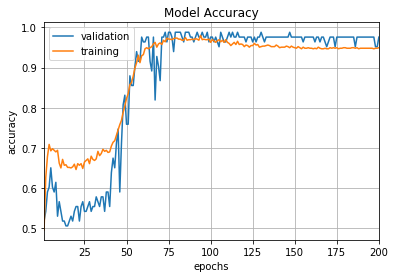

83/83 [==============================] - 0s 38us/step

Fold 8 score : [0.5003464950854519, 0.9759036144578314]
 Score: 0.9759036144578314
fold #9
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7354 - acc: 0.4003 - val_loss: 0.7284 - val_acc: 0.3735
Epoch 2/200
 - 0s - loss: 0.7120 - acc: 0.4003 - val_loss: 0.7062 - val_acc: 0.3735
Epoch 3/200
 - 0s - loss: 0.6972 - acc: 0.4535 - val_loss: 0.6939 - val_acc: 0.5422
Epoch 4/200
 - 0s - loss: 0.6930 - acc: 0.5705 - val_loss: 0.6930 - val_acc: 0.5422
Epoch 5/200
 - 0s - loss: 0.6925 - acc: 0.5878 - val_loss: 0.6924 - val_acc: 0.6145
Epoch 6/200
 - 0s - loss: 0.6923 - acc: 0.5918 - val_loss: 0.6920 - val_acc: 0.6024
Epoch 7/200
 - 0s - loss: 0.6921 - acc: 0.5971 - val_loss: 0.6918 - val_acc: 0.6024
Epoch 8/200
 - 0s - loss: 0.6919 - acc: 0.5957 - val_loss: 0.6916 - val_acc: 0.6145
Epoch 9/200
 - 0s - loss: 0.6918 - acc: 0.5984 - val_loss: 0.6914 - val_acc: 0.6145
Epoch 10/200
 - 0s - loss: 0.6916 - acc: 0.5997 - val

Epoch 96/200
 - 0s - loss: 0.6730 - acc: 0.6090 - val_loss: 0.6726 - val_acc: 0.6627
Epoch 97/200
 - 0s - loss: 0.6726 - acc: 0.6117 - val_loss: 0.6717 - val_acc: 0.6506
Epoch 98/200
 - 0s - loss: 0.6721 - acc: 0.6077 - val_loss: 0.6716 - val_acc: 0.6506
Epoch 99/200
 - 0s - loss: 0.6717 - acc: 0.6090 - val_loss: 0.6713 - val_acc: 0.6627
Epoch 100/200
 - 0s - loss: 0.6713 - acc: 0.6117 - val_loss: 0.6712 - val_acc: 0.6867
Epoch 101/200
 - 0s - loss: 0.6709 - acc: 0.6277 - val_loss: 0.6701 - val_acc: 0.6506
Epoch 102/200
 - 0s - loss: 0.6705 - acc: 0.6077 - val_loss: 0.6697 - val_acc: 0.6627
Epoch 103/200
 - 0s - loss: 0.6701 - acc: 0.6157 - val_loss: 0.6696 - val_acc: 0.6627
Epoch 104/200
 - 0s - loss: 0.6695 - acc: 0.6144 - val_loss: 0.6695 - val_acc: 0.7349
Epoch 105/200
 - 0s - loss: 0.6691 - acc: 0.6144 - val_loss: 0.6686 - val_acc: 0.6627
Epoch 106/200
 - 0s - loss: 0.6686 - acc: 0.6197 - val_loss: 0.6678 - val_acc: 0.6506
Epoch 107/200
 - 0s - loss: 0.6682 - acc: 0.6170 - val_los

Epoch 192/200
 - 0s - loss: 0.6244 - acc: 0.8285 - val_loss: 0.6271 - val_acc: 0.8313
Epoch 193/200
 - 0s - loss: 0.6239 - acc: 0.8298 - val_loss: 0.6265 - val_acc: 0.8313
Epoch 194/200
 - 0s - loss: 0.6233 - acc: 0.8457 - val_loss: 0.6260 - val_acc: 0.8313
Epoch 195/200
 - 0s - loss: 0.6228 - acc: 0.8418 - val_loss: 0.6259 - val_acc: 0.8434
Epoch 196/200
 - 0s - loss: 0.6222 - acc: 0.8471 - val_loss: 0.6246 - val_acc: 0.8193
Epoch 197/200
 - 0s - loss: 0.6215 - acc: 0.8404 - val_loss: 0.6242 - val_acc: 0.8193
Epoch 198/200
 - 0s - loss: 0.6210 - acc: 0.8444 - val_loss: 0.6252 - val_acc: 0.8434
Epoch 199/200
 - 0s - loss: 0.6207 - acc: 0.8524 - val_loss: 0.6232 - val_acc: 0.8193
Epoch 200/200
 - 0s - loss: 0.6200 - acc: 0.8364 - val_loss: 0.6230 - val_acc: 0.8434


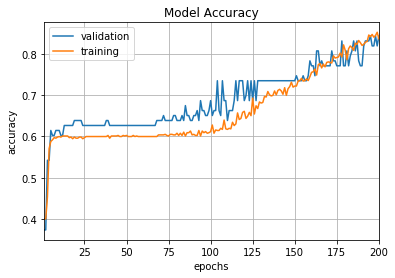

83/83 [==============================] - 0s 38us/step

Fold 9 score : [0.622970593980996, 0.8433735004390579]
 Score: 0.9759036144578314
fold #10
Train on 752 samples, validate on 83 samples
Epoch 1/200
 - 1s - loss: 0.7201 - acc: 0.4348 - val_loss: 0.6974 - val_acc: 0.4458
Epoch 2/200
 - 0s - loss: 0.6920 - acc: 0.6130 - val_loss: 0.6947 - val_acc: 0.4819
Epoch 3/200
 - 0s - loss: 0.6916 - acc: 0.6316 - val_loss: 0.6932 - val_acc: 0.6024
Epoch 4/200
 - 0s - loss: 0.6913 - acc: 0.6303 - val_loss: 0.6927 - val_acc: 0.6265
Epoch 5/200
 - 0s - loss: 0.6911 - acc: 0.6476 - val_loss: 0.6925 - val_acc: 0.6265
Epoch 6/200
 - 0s - loss: 0.6908 - acc: 0.6476 - val_loss: 0.6926 - val_acc: 0.6024
Epoch 7/200
 - 0s - loss: 0.6905 - acc: 0.6383 - val_loss: 0.6922 - val_acc: 0.6265
Epoch 8/200
 - 0s - loss: 0.6902 - acc: 0.6503 - val_loss: 0.6927 - val_acc: 0.5422
Epoch 9/200
 - 0s - loss: 0.6899 - acc: 0.6636 - val_loss: 0.6929 - val_acc: 0.5422
Epoch 10/200
 - 0s - loss: 0.6897 - acc: 0.6543 - val

Epoch 96/200
 - 0s - loss: 0.6287 - acc: 0.8750 - val_loss: 0.6349 - val_acc: 0.9277
Epoch 97/200
 - 0s - loss: 0.6279 - acc: 0.8763 - val_loss: 0.6352 - val_acc: 0.8554
Epoch 98/200
 - 0s - loss: 0.6273 - acc: 0.8750 - val_loss: 0.6337 - val_acc: 0.8675
Epoch 99/200
 - 0s - loss: 0.6263 - acc: 0.8803 - val_loss: 0.6329 - val_acc: 0.9277
Epoch 100/200
 - 0s - loss: 0.6259 - acc: 0.8777 - val_loss: 0.6330 - val_acc: 0.9398
Epoch 101/200
 - 0s - loss: 0.6252 - acc: 0.8803 - val_loss: 0.6315 - val_acc: 0.8916
Epoch 102/200
 - 0s - loss: 0.6241 - acc: 0.8763 - val_loss: 0.6303 - val_acc: 0.8916
Epoch 103/200
 - 0s - loss: 0.6235 - acc: 0.8856 - val_loss: 0.6324 - val_acc: 0.9036
Epoch 104/200
 - 0s - loss: 0.6228 - acc: 0.8763 - val_loss: 0.6295 - val_acc: 0.8795
Epoch 105/200
 - 0s - loss: 0.6221 - acc: 0.8763 - val_loss: 0.6283 - val_acc: 0.9036
Epoch 106/200
 - 0s - loss: 0.6214 - acc: 0.8830 - val_loss: 0.6279 - val_acc: 0.9277
Epoch 107/200
 - 0s - loss: 0.6204 - acc: 0.8803 - val_los

Epoch 192/200
 - 0s - loss: 0.5584 - acc: 0.8923 - val_loss: 0.5677 - val_acc: 0.8916
Epoch 193/200
 - 0s - loss: 0.5578 - acc: 0.8856 - val_loss: 0.5666 - val_acc: 0.9398
Epoch 194/200
 - 0s - loss: 0.5563 - acc: 0.8910 - val_loss: 0.5684 - val_acc: 0.8675
Epoch 195/200
 - 0s - loss: 0.5564 - acc: 0.8856 - val_loss: 0.5655 - val_acc: 0.8916
Epoch 196/200
 - 0s - loss: 0.5553 - acc: 0.8936 - val_loss: 0.5659 - val_acc: 0.9398
Epoch 197/200
 - 0s - loss: 0.5550 - acc: 0.8910 - val_loss: 0.5644 - val_acc: 0.9398
Epoch 198/200
 - 0s - loss: 0.5539 - acc: 0.8936 - val_loss: 0.5632 - val_acc: 0.9398
Epoch 199/200
 - 0s - loss: 0.5530 - acc: 0.8949 - val_loss: 0.5661 - val_acc: 0.9518
Epoch 200/200
 - 0s - loss: 0.5524 - acc: 0.8976 - val_loss: 0.5616 - val_acc: 0.9036


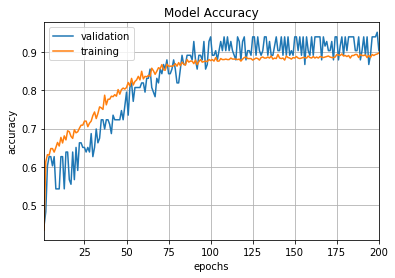

83/83 [==============================] - 0s 38us/step

Fold 10 score : [0.5615681632455573, 0.903614462858223]
 Score: 0.9759036144578314


In [29]:

for train,test in kf.split(actual_x):
    number_of_fold += 1
    print("fold #{}".format(number_of_fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = ann_model(input_shape)

    history = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history)
    
    #model.save("heart_attack_risk_prediction_fold_no_"+str(fold)+"_with_cross_validation.h5")

    rounded_predections = model.predict_classes(test_x,batch_size=10,verbose=0)
    rounded_predicted_result = rounded_predections
    #pred = model.predict(self.test_x)
    pred_class = model.predict_classes(test_x)
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)

    print("\nFold {0} score : {1}\n Score: {2}".format(number_of_fold,score,best_score))

    #print("\n\n")

    #cm = confussion_matrix_generator(test_y,rounded_predicted_result)
    #ROC_curve_generator(model,test_x)

    #print(classification_report(pred_class,test_y,target_names=terget_names))

    #performance(cm)

    #print("\n\nnew\n\n")
    #break

In [30]:
score

[0.5615681632455573, 0.903614462858223]

In [31]:
kfold_validation_score_store

[[0.6381621786526271, 0.6071428585620153],
 [0.5686491500763666, 0.8571428514662243],
 [0.6685187986918858, 0.5952380895614624],
 [0.5750076827548799, 0.8690476190476191],
 [0.6130000125794184, 0.6190476218859354],
 [0.6545711367963308, 0.6024096378360886],
 [0.4304928241005863, 0.8192771098699915],
 [0.5003464950854519, 0.9759036144578314],
 [0.622970593980996, 0.8433735004390579],
 [0.5615681632455573, 0.903614462858223]]

In [32]:
best_score

0.9759036144578314

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 7)                 119       
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 12        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(test_x,test_y)

In [37]:
user_data_predict(model,[50, 1,0,1,0,1,0,1,1,1,1,0,0,0])

ValueError: Error when checking input: expected dense_49_input to have shape (16,) but got array with shape (14,)